PRIMEIRA QUESTÃO
1) Modele os seguintes sólidos/objetos 
Na construção dos sólidos, crie uma função que retorne o sólido ( ou seja, retorne a matriz de vértices e arestas). Perceba que cada objeto é descrito indiretamente (no caso do cone, por exemplo, pelo raio e pela altura). A origem do objeto pode ser definida de forma fixa dentro da função ou, opcionalmente, pode ser passada também como parâmetro da função.

In [107]:
!pip install numpy matplotlib trimesh


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [108]:
import sys
import numpy as np
sys.path.append('./modelos')  # adiciona a pasta modelos ao path

from utils import plotar_malha_3d

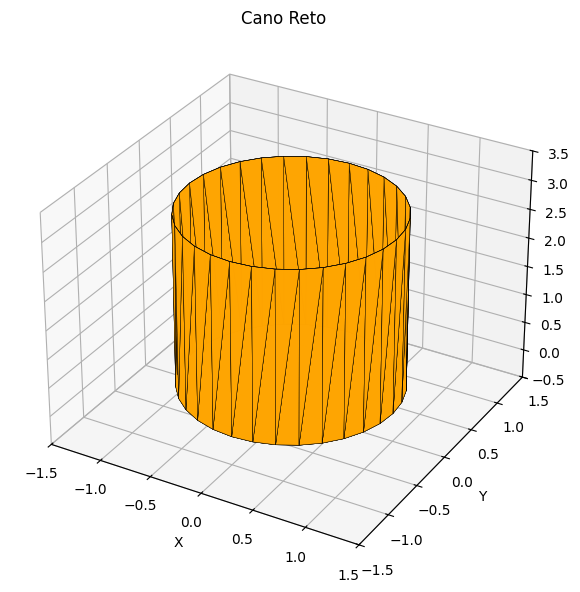

In [109]:
from objeto import Objeto3D

cano_reto = Objeto3D()
cano_reto.modelar_cano_reto(raio_interno=1, raio_externo=1, altura=3.0, resolucao=32)

plotar_malha_3d(cano_reto.vertices, cano_reto.faces, titulo="Cano Reto")

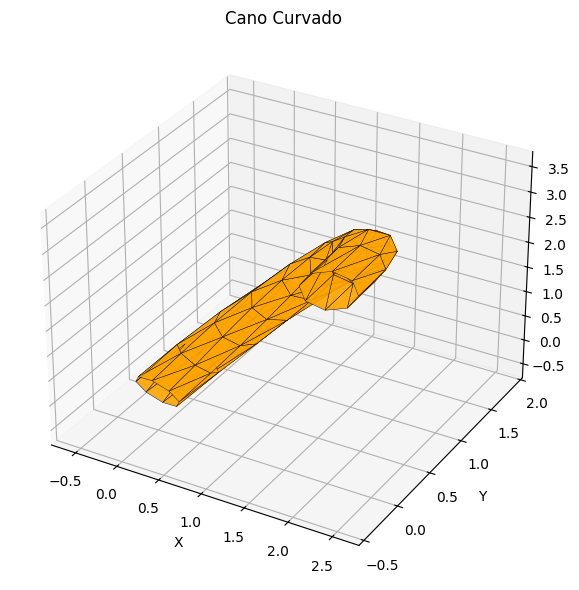

In [110]:
cano_curvado = Objeto3D()

cano_curvado.gerar_cano_curvado(
    P0 = np.array([0, 0, 0]),
    P1 = np.array([2, 0, 3]),
    T0 = np.array([0, 5, 0]), 
    T1 = np.array([0, -5, 0]),
    raio=0.3,
    resolucao_circular=8,
    resolucao_curva=10)

plotar_malha_3d(cano_curvado.vertices, cano_curvado.faces, titulo="Cano Curvado")

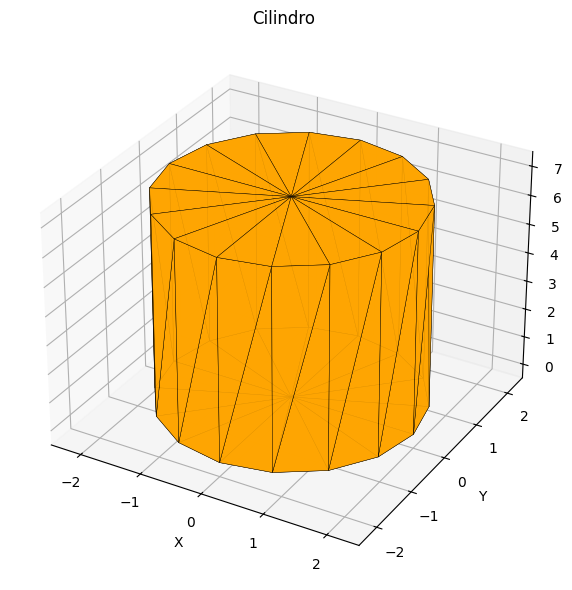

In [111]:
cilindro = Objeto3D()
cilindro.modelar_cilindro(raio=2.0, altura=7.0, resolucao=16)
plotar_malha_3d(cilindro.vertices, cilindro.faces, titulo="Cilindro")

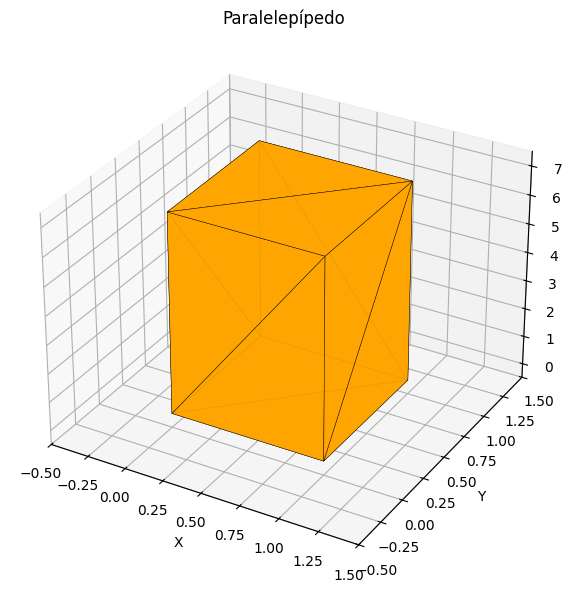

In [112]:
paralelepipedo = Objeto3D()
paralelepipedo.modelar_paralelepipedo(base=1, altura=7, comprimento=1)
plotar_malha_3d(paralelepipedo.vertices, paralelepipedo.faces, titulo="Paralelepípedo")

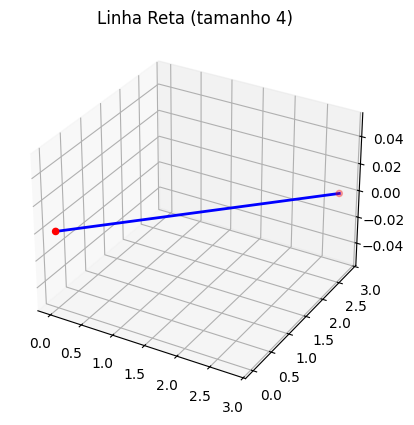

In [113]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

reta = Objeto3D()
reta.modelar_linha(tamanho=4, direcao=np.array([1, 1, 0]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_vals = [v[0] for v in reta.vertices]
y_vals = [v[1] for v in reta.vertices]
z_vals = [v[2] for v in reta.vertices]

ax.plot(x_vals, y_vals, z_vals, color='blue', linewidth=2)
ax.scatter(x_vals, y_vals, z_vals, color='red')  # marca os pontos
ax.set_title("Linha Reta (tamanho 4)")
plt.show()

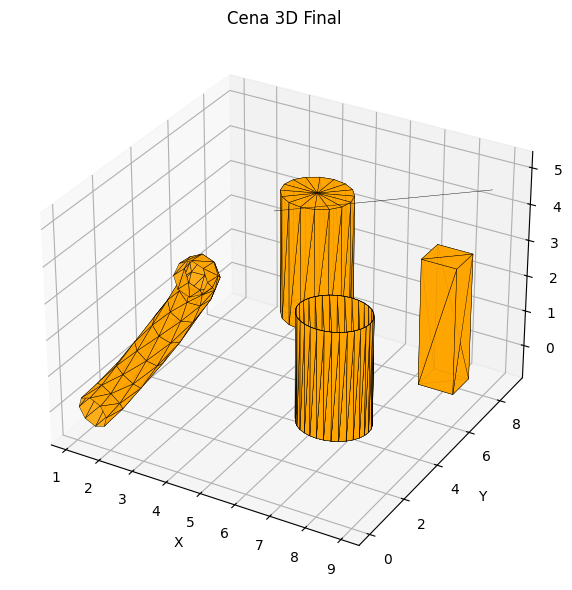

In [114]:
# 1. Modele e transforme individualmente
from utils import normalizar_cena 

cano_reto.aplicar_translacao([0, 0, 0])
#cano_reto.aplicar_rotacao('x', 90)
cano_reto.aplicar_translacao([7, 3, 0])

cano_curvado.aplicar_translacao([1, 0, 0])
cano_curvado.aplicar_escala(sx=1.5,sy=1.5, sz=1.5)

cilindro.aplicar_escala(sx=0.5,sy=0.5, sz=0.5)

cilindro.aplicar_translacao([4, 8, 0])

paralelepipedo.aplicar_escala(sx=1, sy=1, sz=0.5)
#paralelepipedo.aplicar_rotacao('z', 45)
paralelepipedo.aplicar_translacao([8, 6, 0])

reta.aplicar_translacao([3, 3, 3])
reta.aplicar_escala(sx=1.5,sy=1.5, sz=1.5)


cano_reto.vertices = normalizar_cena(cano_reto.vertices)
cano_curvado.vertices = normalizar_cena(cano_curvado.vertices)
cilindro.vertices = normalizar_cena(cilindro.vertices)
paralelepipedo.vertices = normalizar_cena(paralelepipedo.vertices)
reta.vertices = normalizar_cena(reta.vertices)


# 2. Atribuir faces
cano_reto.atribuir_faces()
cano_curvado.atribuir_faces()
cilindro.atribuir_faces()
paralelepipedo.atribuir_faces()
reta.atribuir_faces()

# 3. Unir todos os vértices e faces
vertices_total = (
    cano_reto.vertices +
    cano_curvado.vertices +
    cilindro.vertices +
    paralelepipedo.vertices +
    reta.vertices
)

faces_total = (
    cano_reto.faces +
    cano_curvado.faces +
    cilindro.faces +
    paralelepipedo.faces +
    reta.faces
)

# 4. Normalizar a cena inteira (depois das transformações)
#vertices_total = normalizar_cena(vertices_total, limite=10.0)

# 5. Plotar
plotar_malha_3d(vertices_total, faces_total, titulo="Cena 3D Final")


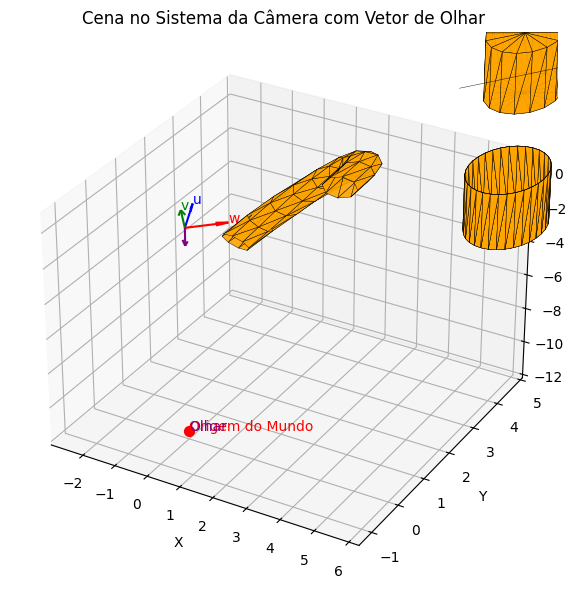

In [115]:
# 1. Definir a câmera
camera_pos = np.array([10, 6, 1])
olhar_para = np.array([0, 0, 0])
up = np.array([0.0, 0.0, 1.0])

# 2. Calcular base da câmera
w = camera_pos - olhar_para
w = w / np.linalg.norm(w)

u = np.cross(up, w)
u = u / np.linalg.norm(u)

v = np.cross(w, u)

# 3. Montar matriz de rotação e translação
R = np.array([
    [u[0], u[1], u[2]],
    [v[0], v[1], v[2]],
    [w[0], w[1], w[2]]
])

T = -R @ camera_pos

# 4. Transformar os vértices para o sistema da câmera
vertices_camera = [ (R @ np.array(v) + T).tolist() for v in vertices_total ]

# 5. Manter as mesmas faces
faces_camera = faces_total

# 6. Mostrar a origem do mundo no sistema da câmera (como um ponto visual)
origem_mundo_camera = (R @ np.array([0.0, 0.0, 0.0]) + T).tolist()
vertices_camera.append(origem_mundo_camera)
faces_camera.append([origem_mundo_camera, origem_mundo_camera, origem_mundo_camera])  # ponto isolado

# Preparar os vetores de base da câmera para desenhar
eixos_camera = {
    'u': u,
    'v': v,
    'w': w
}

# Plotar com vetor de olhar
plotar_malha_3d(
    vertices_camera,
    faces_camera,
    titulo="Cena no Sistema da Câmera com Vetor de Olhar",
    ponto_destaque=origem_mundo_camera,
    eixos=eixos_camera,
    vetor_olhar=(camera_pos @ R.T + T, olhar_para @ R.T + T)  # transformar origem e destino para sistema da câmera
)

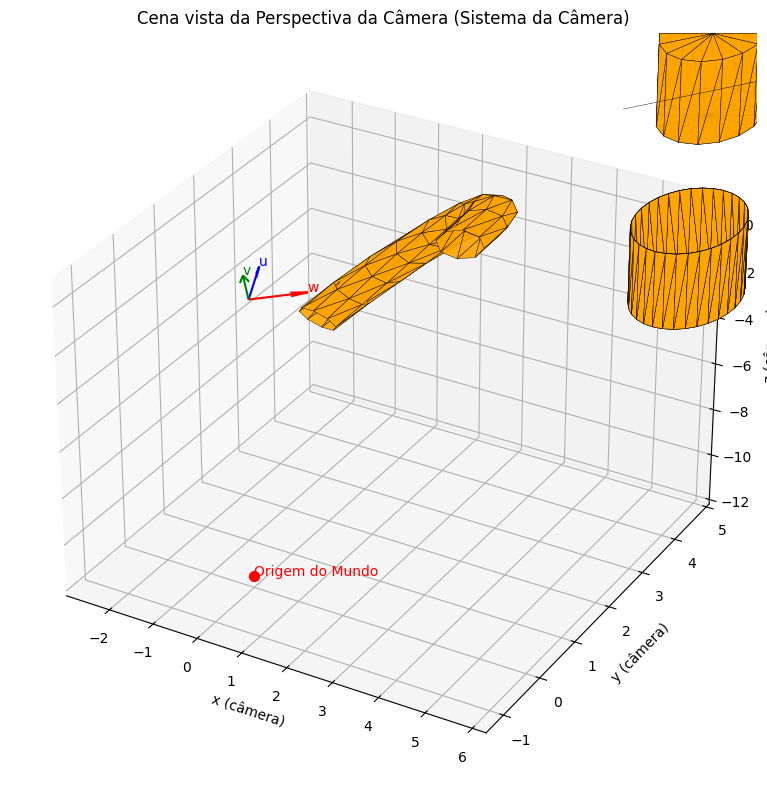

In [116]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

# 1. Preparar a cena 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 2. Desenhar as faces da malha
malha = Poly3DCollection(faces_total, facecolor='orange', edgecolor='black', linewidths=0.3, alpha=0.9)
malha.set_verts(faces_camera)  # usa os vértices transformados para o sistema da câmera
ax.add_collection3d(malha)

# 3. Plotar a origem do mundo (transformada para o sistema da câmera)
ax.scatter(*origem_mundo_camera, color='red', s=50)
ax.text(*origem_mundo_camera, "Origem do Mundo", color='red')

# 4. Desenhar os eixos da câmera (u, v, w)
ax.quiver(0, 0, 0, u[0], u[1], u[2], length=1.0, color='blue', normalize=True)
ax.text(*u, "u", color='blue')
ax.quiver(0, 0, 0, v[0], v[1], v[2], length=1.0, color='green', normalize=True)
ax.text(*v, "v", color='green')
ax.quiver(0, 0, 0, w[0], w[1], w[2], length=1.0, color='red', normalize=True)
ax.text(*w, "w", color='red')

# 5. Configurações do gráfico
x_vals = [v[0] for v in vertices_camera]
y_vals = [v[1] for v in vertices_camera]
z_vals = [v[2] for v in vertices_camera]

margem = 0.5
ax.set_xlim([min(x_vals) - margem, max(x_vals) + margem])
ax.set_ylim([min(y_vals) - margem, max(y_vals) + margem])
ax.set_zlim([min(z_vals) - margem, max(z_vals) + margem])

ax.set_xlabel("x (câmera)")
ax.set_ylabel("y (câmera)")
ax.set_zlabel("z (câmera)")
ax.set_title("Cena vista da Perspectiva da Câmera (Sistema da Câmera)")

plt.tight_layout()
plt.show()

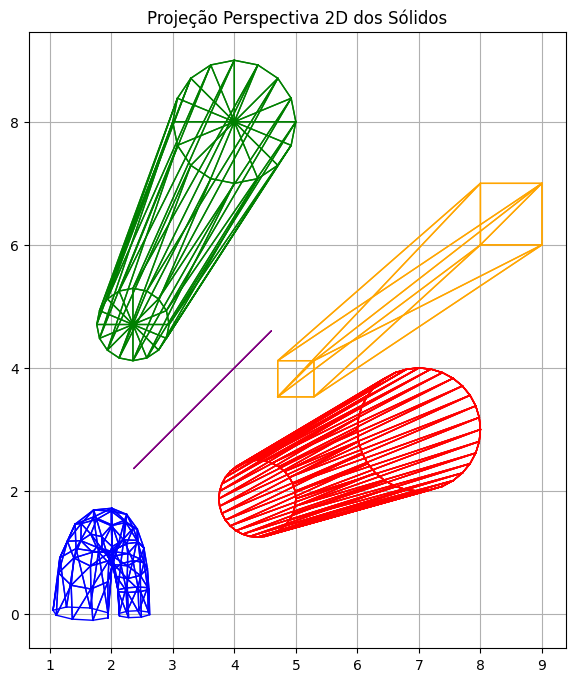

In [117]:

from utils import desenhar_em_2d

lista_vertices = [
    cano_reto.vertices,
    cano_curvado.vertices,
    cilindro.vertices,
    paralelepipedo.vertices,
    reta.vertices
]

lista_faces = [
    cano_reto.faces,
    cano_curvado.faces,
    cilindro.faces,
    paralelepipedo.faces,
    reta.faces
]

# Lista de cores (1 por objeto)
cores = ['red', 'blue', 'green', 'orange', 'purple']

# Chama a função para exibir
desenhar_em_2d(lista_vertices, lista_faces, cores)

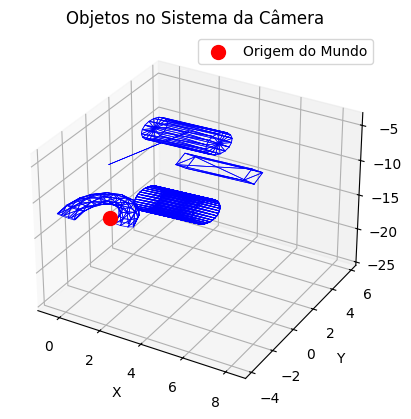

In [118]:
# 3) Transformar cena para o sistema da câmera

# a. Definir posição da câmera (eye) e ponto de interesse (target)
camera_pos = np.array([10, 10, 10])
camera_target = np.array([0.0, 0.0, 0.0])
up_vector = np.array([0.0, 1.0, 0.0])

# b. Calcular a base da câmera
z_c = camera_pos - camera_target
z_c = z_c / np.linalg.norm(z_c)

x_c = np.cross(up_vector, z_c)
x_c = x_c / np.linalg.norm(x_c)

y_c = np.cross(z_c, x_c)
y_c = y_c / np.linalg.norm(y_c)

R_camera = np.stack([x_c, y_c, z_c], axis=0)  # matriz 3x3

# c. Função para transformar vértices para o sistema da câmera
def transformar_para_camera(vertices, camera_pos, R_camera):
    vertices_np = np.array(vertices)  # (N, 3)
    return (R_camera @ (vertices_np - camera_pos).T).T.tolist()

# d. Transformar todos os vértices da cena
vertices_camera = transformar_para_camera(vertices_total, camera_pos, R_camera)

# e. Transformar a origem do mundo (0, 0, 0) para o sistema da câmera
origem_mundo_camera = transformar_para_camera([[0, 0, 0]], camera_pos, R_camera)[0]

# f. Plotar cena no sistema da câmera
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for face in faces_total:
    face_vertices = [np.dot(R_camera, np.array(v) - camera_pos) for v in face]

    x = [v[0] for v in face_vertices]
    y = [v[1] for v in face_vertices]
    z = [v[2] for v in face_vertices]

    x.append(x[0])
    y.append(y[0])
    z.append(z[0])

    ax.plot(x, y, z, color='blue', linewidth=0.5)

# Plota a origem do mundo no sistema da câmera
origem_mundo_camera = np.dot(R_camera, -camera_pos)
ax.scatter(origem_mundo_camera[0], origem_mundo_camera[1], origem_mundo_camera[2],
           color='red', s=100, label='Origem do Mundo')

ax.set_title("Objetos no Sistema da Câmera")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()